# Particle tracking (under construction)

*Prof. dr.ir. T.N.Olsthoorn*

*Heemstede, 26 Oct 2016

## Flow lines as opposed to stream lines
Particle tracking is one of the functions most used in a groundwater model. Contrary to stream lines that require steady-state 2D flow without sources and sinks, particles may always be tracked to create flow lines. Clearly, particles starting at the same location may not follow the same path if released at different times in a transient model. In the random walk technique particles are even given a random displacement at each time step to simulate dispersion, which alters the path of individual particles in an unforeseen manner, thus simulating dispersion.

Particle tracking in finite difference models is quite straightforward. The flows perpendicular to the cell faces are known and, therefore, the specific discharge at theses faces may be approximated by dividing by their surface area. Average. As the porosity in the cells at either side of a cell face may differ, so may the groundwater velocity perpendicular to the cell face, even though the specific discharge does not.

In finite difference modeling, the flow in `x`, `y` and `z`- direction, which is parallel to the axes of the model, is linearly interpolated between that at opposite cell faces. This implies that the flow in `x`-direction (and velocity for that matter) is only a function of `x`, the velocity in `y`-direction only a function of `y` and the one in `z`-direction only depends on `z`. This is consistent with the model assumptions and largely simplifies the analysis. However, for large cells it may not be accurate. So it may be necessary to use smaller cells where large variations in velocity occur in value and direction. On the other hand the elegance of this approach is that the divergence remains zero in a cell. This means no water is lost, so that the flow paths by themselves are consistent.

## Theory

It's easier to write equations in Lyx than it is to write them in markdown or pure LaTeX.

The idea is to use relative coordinates.

Because the elevation of cells in a 3D finite difference grid may vary from cell to cell in the same layer, it may jump when particles cross vertical cell faces. Exactly at such cell faces, the elevation is undetermined in such a grid. This makes it much more convenient to use relative coordinates, in which each cell of the grid is a cube of sides of length 1. To keep the travel time within each cell in each direction the same we divide the velocity in direction $x$ by $\Delta x$ and likewise in the other directions.

Because we only have the flows at the cell faces, we have to assume that the velocity varies linearly between two opposite cell faces. For the x-direction we thus obtain for an arbitrary cell $v_{x}=\frac{Q_{xL}}{\epsilon R\Delta y\Delta z}+\left(\frac{Q_{xr}-Q_{xl}}{\epsilon R\Delta y\Delta z}\right)\left(\frac{x-x_{L}}{\Delta x}\right)$

where $\epsilon$ is the effective porosity of the considered cell and $R$ is the retardation due to sorption ($R=1$ in the absence of sorption).

To change to the velocity in the grid that consists of unit cubes, we have

$$
v_{u}	=\frac{v_{x}}{\Delta x}
	=\frac{Q_{x0}}{\epsilon RV}+\frac{Q_{x0}-Q_{x1}}{\epsilon RV}\left(\frac{x-x_{0}}{\Delta x}\right)
	=v_{u0}+\left(v_{u1}-v{}_{u0}\right)\left(u-u_{0}\right)
	=v_{u0}+a_{u}\left(u-u_{0}\right)
$$

with

$$
a_{u}=v_{u1}-v_{u0}
$$

The index 0 denotes the left side of the cell and the index 1 denotes the right side. This corresponds with the relative local coordinates in the unit cube cell.

All values $v_{u0}$, $v_{u1}$ and $a_{u}$ can be computed a priori for all cells in the relative grid. The same is true for the other two axes, $y$, and $z$, that become directions $v$ and $w$ in the relative grid.

As long as we are within a single cell we can set

$$
U=u-u_{0}
$$

in which $0\le U\le1$ and $U$ is the local coordinate.

The travel time in this cell from intial position $U_s$ to an arbitrary position $U$ then follows from

$$
\frac{dU}{dt}=v_{u0}+a_{u}U
$$

$$
dt=\frac{dU}{v_{u0}+a_{u}U}
$$

$$
dt=\frac{1}{a_{u}}\frac{d\left(v_{u0}+a_{u}U\right)}{v_{u0}+a_{u}U}
$$

$$
a_{u}\left(t-t_{s}\right)=\ln\left(\frac{v_{u0}+a_{u}U}{v_{u0}+a_{u}U_{s}}\right)
$$

in which the index $s$ denotes the position at the start, $t=t_{s}$, $U=U_{s}$.

If $v_{u_0} >0$, then we find the time that the particle hits the cell face by setting $U=1$. If $v_{u_0}<0$ we find it by setting $U=0$.

Of course, this only makes sense if the argument of the $\ln(-)$ is greater than 0. That is, if the velocities at the two opposite cell faces have the same sign. If not, the velocity is zero somewhere within the cell and the particle can never reach the opposite face. The arrival time may then immediately be set equal to $\infty$.

Another problem occurs when $a_{u}=0$, i.e. when the velocities at opposite cell faces are the same. In that case the velocity is constant so that the arrival time can be obtained from

$$
t-t_{s}=\frac{U-U_{s}}{v_{u0}}
$$

Therefore we have to select the linear or the logarithmic equation to compute the time that the cell-face is it of set it to $\infty$ when it will ever be hit, which is also true of both $v_{u0}$ and $a_{u}$ are zero.

We do the same for the $v$ and the $w$ directions that correspond to $y$ and $z$ in the original grid.

The result is three hitting times, of which the smallest one determines when the particle firs hits one of the 6 cell faces of the cube. If this time is smaller than our end-time, we move the particle to that face and subtract the time from the original time, to get the time that it still has to travel. If the time is larger than the end-time, we set the time to the end-time and move the particle accordingly, after which the simulation for this particle has finished.

$$
a_{u}U=\left(v_{u0}+a_{u}U_{s}\right)e^{a_{u}\left(t-t_{s}\right)}-v_{u0}
$$

$$
U=U_{s}e^{a_{u}\left(t-t_{s}\right)}+\frac{v_{u0}}{a_{u}}\left(e^{a_{u}\left(t-t_{s}\right)}-1\right)
$$

and for the linear case

$$
U=\left(t-t_{s}\right)v_{u0}+U_{s}
$$

For these formulas to work, it is necessary that the the sign of the velocities is in line with the direction of the axis. In the relative grid we let $u$, $v$ and $w$ run in the direction of increasing cell indices. This is the case for the $x$ direction where increasing $x$ values coincide with increasing column indices. This is not true for the $y$ and the $z$ directions, where the coordinates run opposite to the cell indices in those directions. Therefore, we have to invert the sing of the $Q_{y}$ and $Q_{z}$ arrays front up.

When the end-time has not been reached, the particle crosses over to the next cell. We update its indices to that of the next cell and also update its relative coordinates $U$, $V$ and $W$ to reflect the starting position of the particle within the new cell.

Particles may end-up in sinks, i.e. cell from which water leaves the model. We will assume that particles have left the model when the enter a cell that is a large-enough sink, that is, a cell for which the total extraction is larger than $sinkFrac\times Q_{intot}$, where is chosen by the user as $0\le sinkFrac\le1$, usually 0.25 and $Q_{intot}$ is the total inflow of the cell through its cell faces.

Relative coordinates can be readily computed by interpolation using cell grid indices as known values like so:

$$
u=\mathrm{interp}\left(xp,\,xGr,\,\mathrm{arange}\left(\mathrm{len}\left(xGr\right)\right)\right)
$$

$$
U=u-\mathrm{floor}\left(u\right)
$$

where $xp$ is a grid coordinate, $xGr$ are the grid coordinates of the grid lines between the columns and $\mathrm{arange()}$ is the Python function that generates numbers between 0 and the specified number ($\mathrm{len}(xGr)$).

Computing grid coordinates from relative coordinates works the other way around

$$
x=\mathrm{interp}\left(U+i_{u},\,\mathrm{arange}\left(\mathrm{len}\left(xGr\right)\right),\,xGr\right)
$$

in which $i_{u}$ is the cell index of the particle along the $x$ direction, $u=U+i_{u}$, and $i_{u}=\mathrm{floor}\left(u\right)$.

In general, we should not have to worry about particles leaving the model, because the velocities perpendicular to all outer faces of the model are zero in the finite difference concept.

## Implementation

The implementation can be found in the module `./modules/mfpath.py`. It is about 900 lines, too long to include it in this notebook.


The logic of the particle tracking model is as follows:

* Switch to normalized coordinates $u$, $v$, and $w$
* Compute the velocities at all cell faces in all directions (6 values per cell)
* To track particles compute in local coordinates when they hit the walls of their local cell, which is a uit cube in th normalize grid. The local coordinats are all between 0 and 1 in each cell. To get the normalized coordinates, add the indices of the cell, $u = iu + U$ where $iu$ is the cell index along the $u$ axis and $U$ the local coordinate.
* Doing this and knowning by the sight of the velocity $vu$ wich cell face will be hit, we obtain three hitting times per particle. The smallest time is chosen, together with the corresponding cell face.
* The particle is moved over this smallest time interval, updating its three ocal coordinates.
* The index of the cell is updated for the direction into which the particle hits the cell facce.
* The local coordinate of the particle in this direction is reset: if the particle left into the direction of
inceasing grid index, it is reset to zero and 1 is added to its cell index is, if it left in opposite direction, it is set to 1.0 and its cell index is reduced by one.
* The coordinates in the other two directions where the particle did not hit the cell face, are left unchanged.

The time in the previous cell is subtracted from the remaining time, after which the procedure is repreated, as long as the remaining time is still larger than zero. After the remaining time has been used up by all particles that are still moving, the next time in the series for which we want particle coordinates has been reached. The particle coordinates are then saved after having them back-transformed to those of the original grid. This play is repeated until all particles have reached the final simulation time, or until no more flowing particles are presented in the model, because the last ones have been swallowed by sinks or stagnated near water divides.

Afterwards, the trackes can be displayed simultaneously or be simulated or animated. The stored partciles correspond to the times that were given to the model. The detail is therefore completely defined by the user.

## Verification

To check the particle tracking use some convenient analytical solutions

A cross section, thickness `H`, porosity and recharge `n`, with a water divide at `x=0` center obeys the following relations

$$
v_{x}=\frac{dx}{dt}=\frac{nx}{\epsilon H}\rightarrow\frac{dx}{x}=\frac{n}{\epsilon H}dt\rightarrow\ln\left(x\right)=\frac{n}{\epsilon H}t+C\,\,\,\,\left(\mbox{with}\,t=t_{0},\,x=x_{0}\right)
$$

$$
\ln\left(x_{0}\right)=\frac{n}{\epsilon H}t_{0}+C\rightarrow C=\ln\left(x_{0}\right)-\frac{n}{\epsilon H}t_{0}
$$

$$
\ln\left(\frac{x}{x_{0}}\right)=\frac{n}{\epsilon H}\left(t-t_{0}\right)\rightarrow x=x_{0}\exp\left(\frac{n}{\epsilon H}\left(t-t_{0}\right)\right)
$$

This can be used to check the travel time in the model in two directions.

Another simple check is a well in a confined aquifer. Here we have

$$
Qt=\epsilon H\pi R^{2}\rightarrow R=\sqrt{\frac{Qt}{\pi\epsilon H}}
$$

So set up a model, run it, contour the results, run fdm2path, and check its results by clicking a point near the well

## Example

The example used when we developed the stream lines is reused here to show both the stream lines and the tracked particles. They should match in the steady-state situaion, when particles are released on stream lines.

Cross section (flat) with heads, streamlines and some particle tracks, obtained by clicking on the figure when fdm2path is running (backward traces as times were negative, see input above). There is great detail near the sheet piling where all the streamlines converge, which can only be seen by zooming in. 

In [2]:
myModules = './modules/'
import numpy as np
import matplotlib.pyplot as plt
import sys

if myModules not in sys.path:
    sys.path.insert(1, myModules)

Forward tracking, because T is ascending
Job done, 19 particles tracked for time  from t=0.0 to t=3650.0 in 99time steps.
    The results are in variable Pcl (a 'named_tuple 'Pcl'.
    whose importnat fields are Status, X, Y, Z, T, up, vp, wp.
    At the and there were:
    2 particles still active
    17 particles captured by sinks
    0 particles stagnant
    The average arrival time of the captured particles is 0.10526315789473684
    



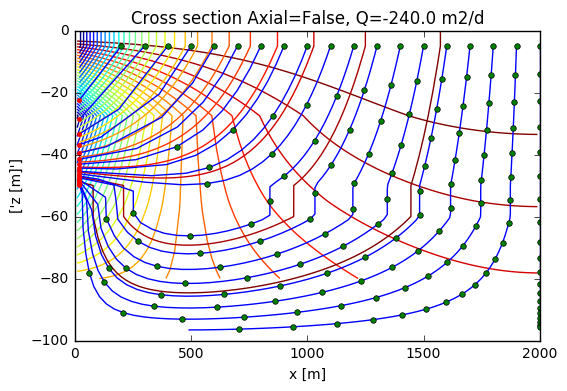

In [29]:
import mfgrid
import fdm
import mfpath
import pdb

axial = False
Q    = -2400 if axial else -240. # m3/d if axial else m2/
por  = 0.35 # [-], effective porosity

xGr = np.logspace(-1, 4, 51)
xGr = np.linspace(0, 2000, 101)
yGr = np.array([-0.5, 0.5])
zGr = np.array([0., -5, -50, -60, -100])
gr   = mfgrid.Grid(xGr, yGr, zGr, axial)

IBOUND = gr.const(1); IBOUND[:,:,0] = -1 # head in top confining unit fixed
k      = gr.const(np.array([0.01, 10., 0.01, 20.]))
FH     = gr.const( 0.);
FQ     = gr.const( 0.)
FQ[0, 0, 1] =  Q # insecond layer

# run flow model
Out = fdm.fdm3(gr, (k, k, k), FQ, FH, IBOUND)

Psi = fdm.psi(Out.Qx)

#pdb.set_trace()

# visualize
title = 'Cross section Axial={0}, Q={1} {2}'.format(axial, Q, 'm3/d' if axial else 'm2/d')
ax = plt.figure().add_subplot(111)
xlim = gr.x[[0,-1]]
ax.set(xlabel='x [m]', ylabel=['z [m]'], title=title, xlim=xlim)

ax.contour(gr.xm, gr.zm, Out.Phi[0].T, 30)
ax.contour(gr.xp, gr.zp, Psi, 30)
#plt.show()

# path lines
T=np.linspace(0, 3650, 100) #time series
if True:
    Xp = np.linspace(200, 2000., 19)
    Yp = np.zeros(Xp.shape)
    Zp = np.ones(Xp.shape) * -5.
else:
    Zp = np.linspace(-5., -95., 19)
    Yp = np.zeros(Zp.shape)
    Xp = np.ones(Zp.shape) * 1000.

#Pcl = mfpath.particle_tracker(gr, Out, por, T, Xp, Yp, Zp)
Pcl = mfpath.particle_tracker(gr, Out, gr.const(por), T=T, particles=(Xp, Yp, Zp), sinkfrac=0.75, verbose=False)

mfpath.plot_particles(Pcl, axes=ax, first_axis='y', ls='none',
                      markers='o    ', mfc='green', markersize=4)

plt.show()
#R = np.sqrt(Q * T[-1] / (np.pi * por * np.sum(gr.dy)))  

TODO: More examples will follow. A number of them in 3D are already in the testsuite

## Conclusion

We have implemented the particle tracking and used it both interactively as in batch mode. The method was verified by comparison with the stream lines drived from the stream function. Tracking particles allows computing travel times, both forward and backward tin time.

Flow lines can be used where stream lines cannot, as flow lines don't require 2D divergence-free flow. Flow lines can also be used in transient situations. Flow lines with travel times are amongst the most used results of groundwater modeling, wherever pollution is involved.

To even better track particles while including dispersion and diffusion, we could track massive amounts of particles. This also allows computation of arrival concentrations. This is the subject of the last chapter.